In [330]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [331]:
df = pd.read_csv('diabetes dataset.csv')

In [332]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [333]:
# 1. Number of times pregnant
# 2. Plasma glucose concentration a 2 hours in an oral glucose tolerance test
# 3. Diastolic blood pressure (mm Hg)
# 4. Triceps skin fold thickness (mm)
# 5. 2-Hour serum insulin (mu U/ml)
# 6. Body mass index (weight in kg/(height in m)^2)
# 7. Diabetes pedigree function
# 8. Age (years)
# 9. Outcome variable (0 or 1)

In [334]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.0 KB


In [335]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [336]:
df[df.isnull()].count()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

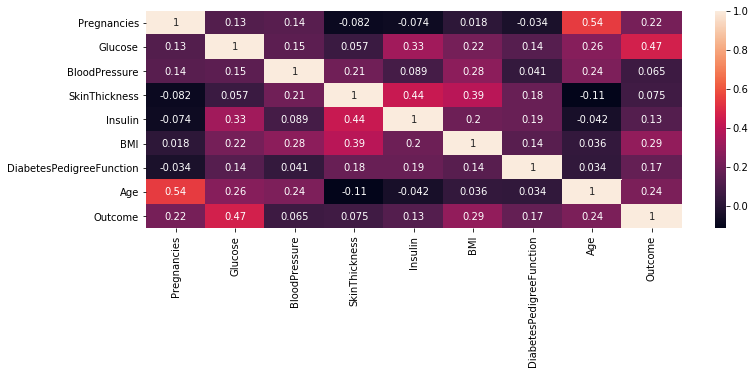

In [337]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

In [338]:
print(df[(df['Glucose']==0)]['Glucose'].count())
print(df[(df['BloodPressure']==0)]['BloodPressure'].count())
print(df[(df['SkinThickness']==0)]['SkinThickness'].count())
print(df[(df['BMI']==0)]['BMI'].count())
print(df[(df['Insulin']==0)]['Insulin'].count())

5
35
227
11
374


In [339]:
df['Glucose']=df['Glucose'].replace(to_replace=0,value=df['Glucose'].mean())
df['BloodPressure']=df['BloodPressure'].replace(to_replace=0,value=df['BloodPressure'].mean())
df['SkinThickness']=df['SkinThickness'].replace(to_replace=0,value=df['SkinThickness'].mean())
df['Insulin']=df['Insulin'].replace(to_replace=0,value=df['Insulin'].mean())
df['BMI']=df['BMI'].replace(to_replace=0,value=df['BMI'].mean())

In [340]:
df[(df['Outcome']==1)]['Outcome'].count()

268

In [341]:
df[(df['Outcome']==0)]['Outcome'].count()

500

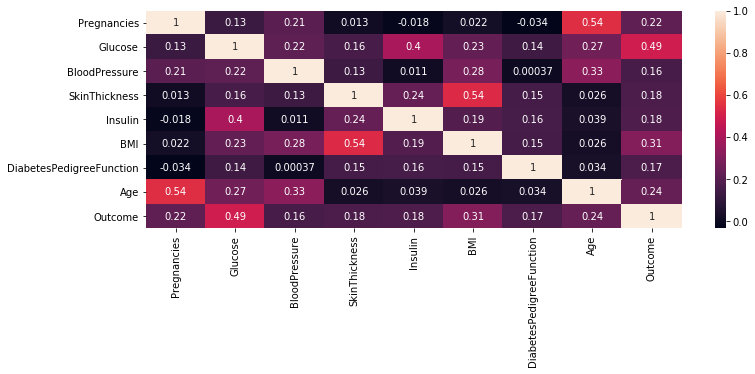

In [342]:
plt.figure(figsize=(12,4))
sns.heatmap(df.corr(),annot=True)

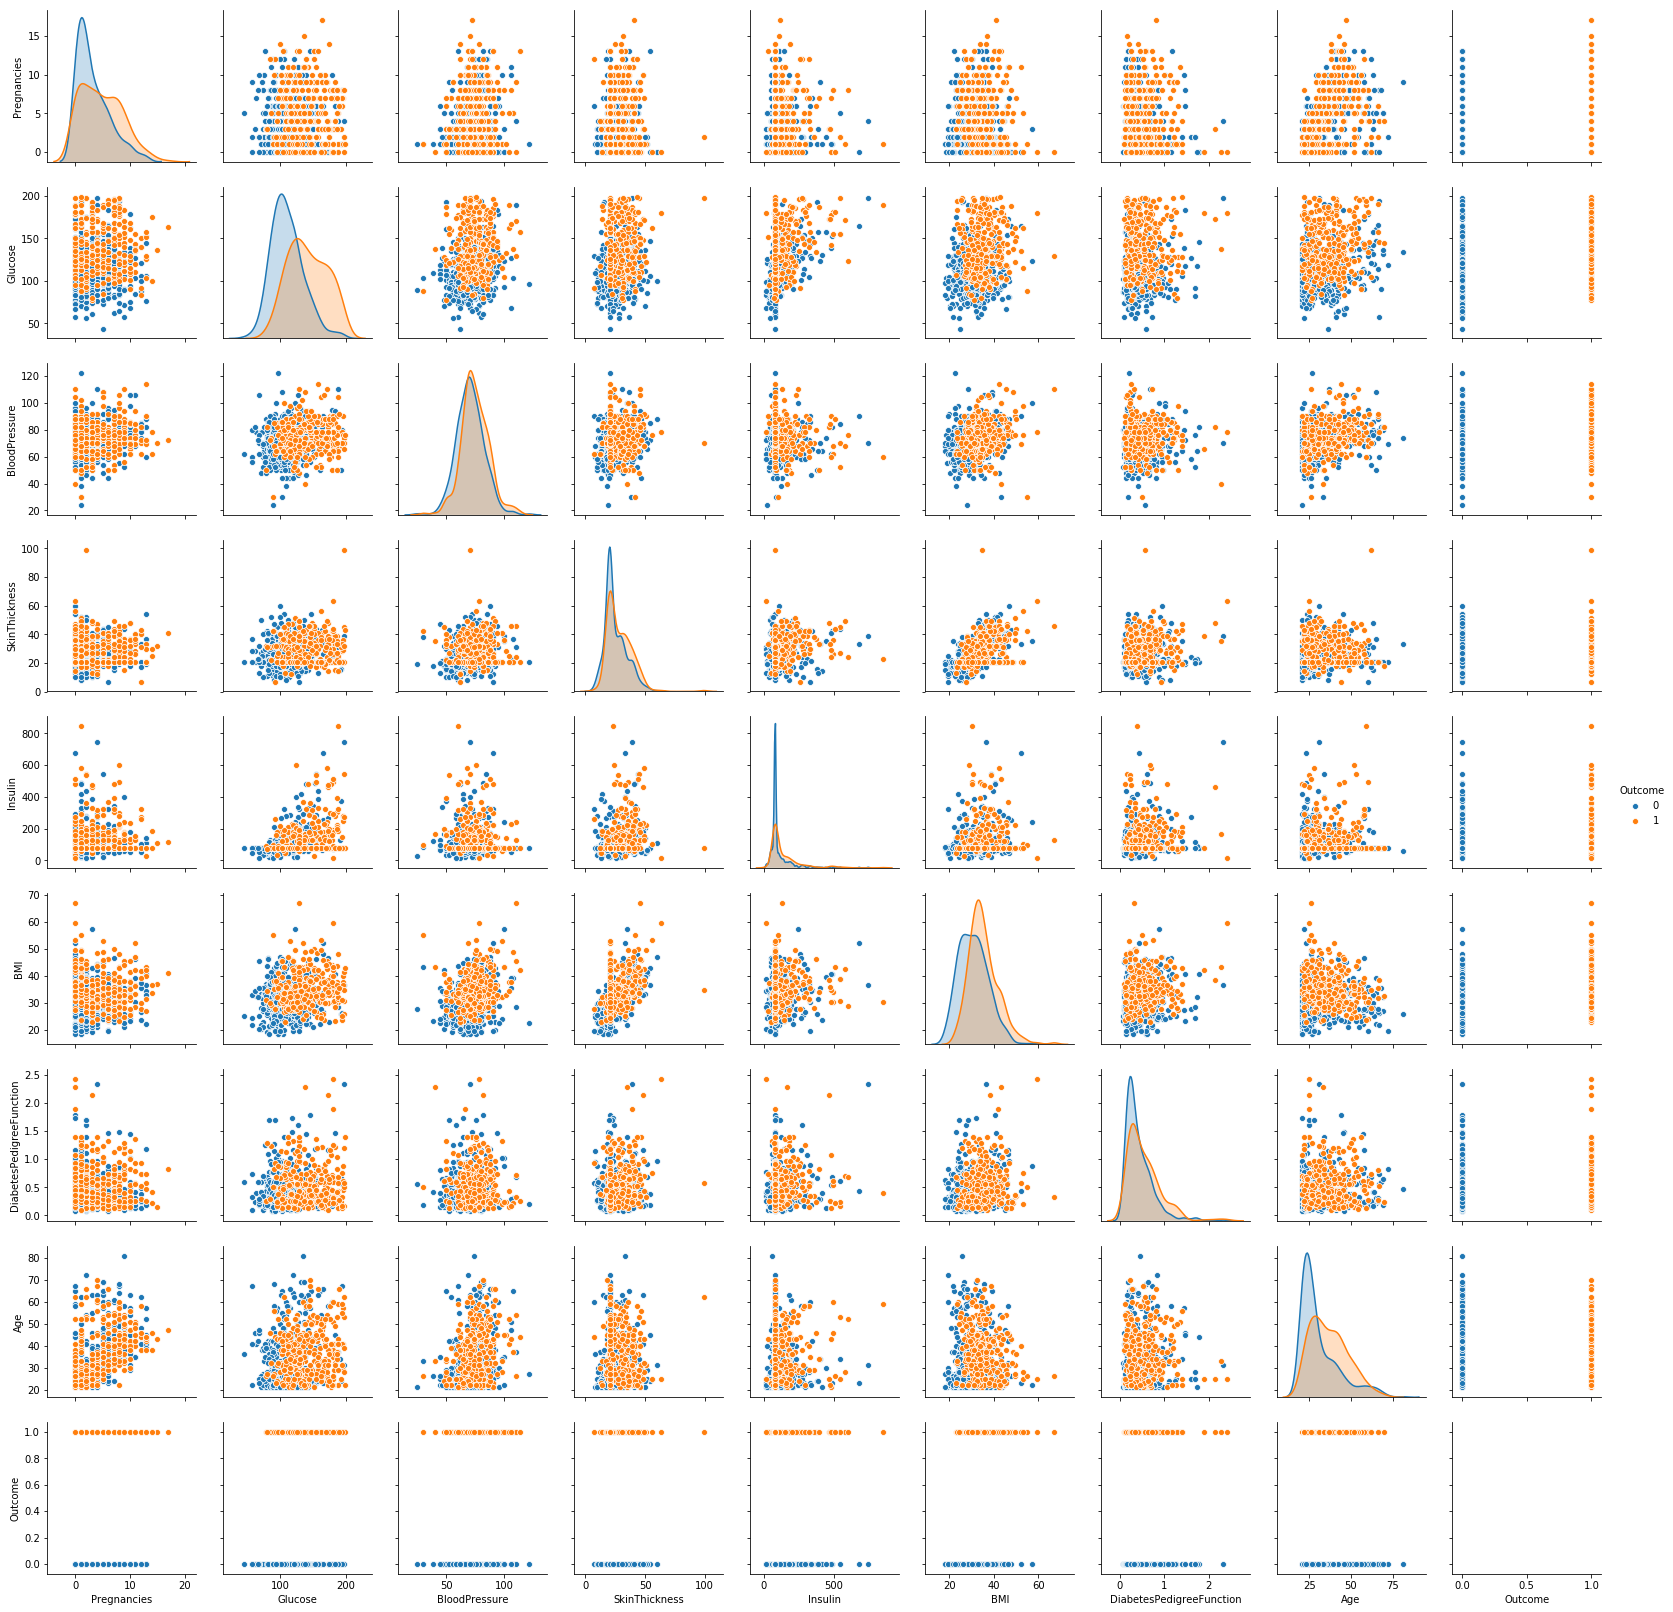

In [343]:
sns.pairplot(df,hue='Outcome')

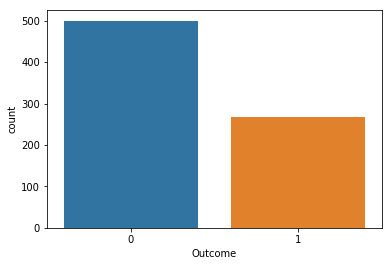

In [344]:
sns.countplot(x='Outcome',data=df)

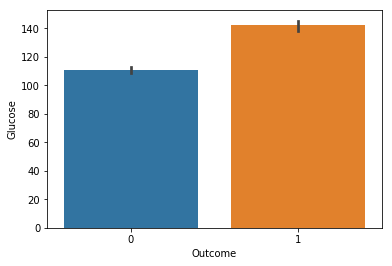

In [345]:
sns.barplot(x='Outcome',y='Glucose',data=df)

Text(0,0.5,'Glucose')

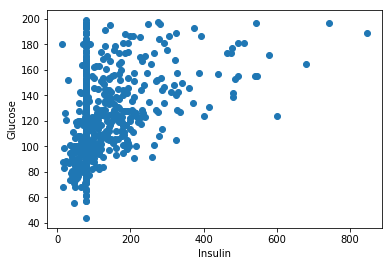

In [346]:
plt.scatter(x='Insulin',y='Glucose',data=df)
plt.xlabel('Insulin')
plt.ylabel('Glucose')

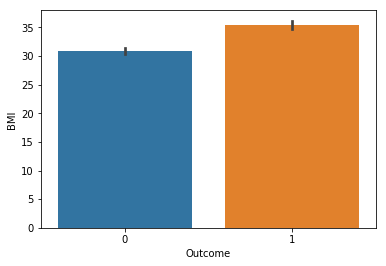

In [347]:
sns.barplot(x='Outcome',y='BMI',data=df)

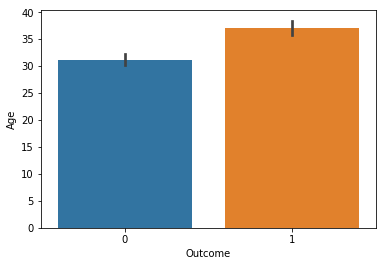

In [348]:
sns.barplot(x='Outcome',y='Age',data=df)

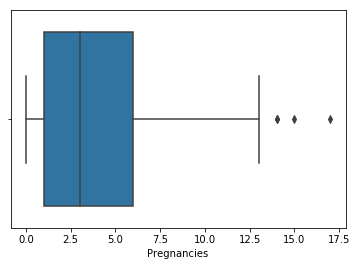

In [349]:
sns.boxplot(x='Pregnancies',data=df)

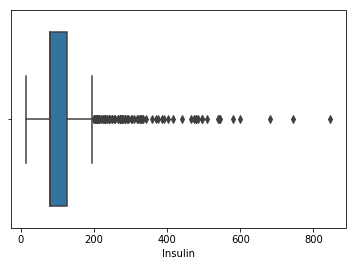

In [350]:
sns.boxplot(x='Insulin',data=df)

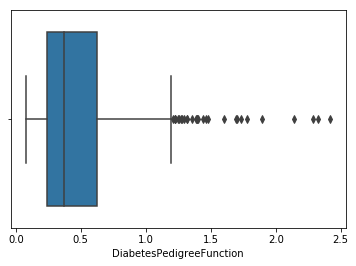

In [351]:
sns.boxplot(x='DiabetesPedigreeFunction',data=df)

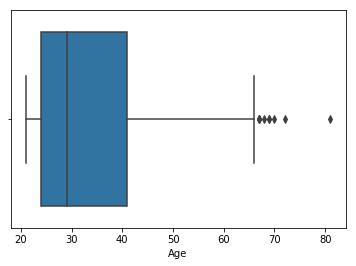

In [352]:
sns.boxplot(x='Age',data=df)

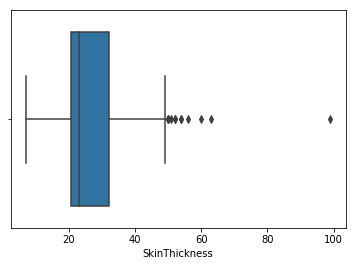

In [353]:
sns.boxplot(x='SkinThickness',data=df)

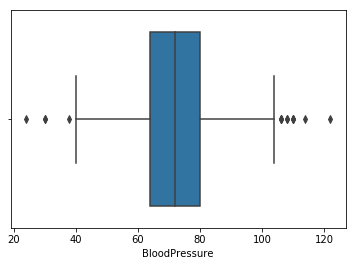

In [354]:
sns.boxplot(x='BloodPressure',data=df)

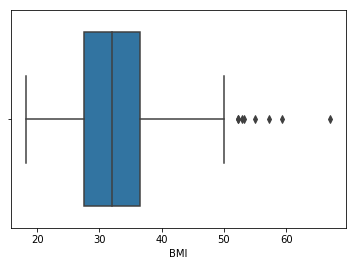

In [355]:
sns.boxplot(x='BMI',data=df)

In [356]:
df.loc[(df['BMI']>=18.5) & (df['BMI']<=24.9) ,'Obesity'] = 'Normal'
df.loc[(df['BMI']>=25) & (df['BMI']<=29.9) ,'Obesity'] = 'Overweight'
df.loc[(df['BMI']>=30) & (df['BMI']<=34.9) ,'Obesity'] = 'Obese 1'
df.loc[(df['BMI']>=35) & (df['BMI']<=39.9) ,'Obesity'] = 'Obese 2'
df.loc[(df['BMI']>=40),'Obesity'] = 'Obese 3'

In [357]:
df.loc[(df['Glucose']<100),'Result'] = 'Normal'
df.loc[(df['Glucose']>=100) & (df['Glucose']<=125) ,'Result'] = 'Prediabetic'
df.loc[(df['Glucose']>125),'Result'] = 'Diabetic'

In [358]:
df.loc[(df['Insulin']<200),'Level'] = 'Low'
df.loc[(df['Insulin']>=200),'Level'] = 'High'

In [359]:
df['pdratio'] = df['Glucose'] / df['DiabetesPedigreeFunction']

In [360]:
columns = df[['Obesity','Result','Level']]
cat_df=pd.DataFrame(columns)
cat_df=pd.get_dummies(cat_df)
df=pd.merge(df,cat_df,left_index=True,right_index=True)
df=df.drop(['Obesity','Result','Level'],axis=1)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,pdratio,Obesity_Normal,Obesity_Obese 1,Obesity_Obese 2,Obesity_Obese 3,Obesity_Overweight,Result_Diabetic,Result_Normal,Result_Prediabetic,Level_High,Level_Low
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1,236.044657,0,1,0,0,0,1,0,0,0,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0,242.165242,0,0,0,0,1,0,1,0,0,1
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1,272.321429,1,0,0,0,0,1,0,0,0,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0,532.934132,0,0,0,0,1,0,1,0,0,1
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1,59.877622,0,0,0,1,0,1,0,0,0,1


In [361]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
scaler.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','pdratio']])
scaled_features = scaler.transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','pdratio']])
scaled_features

array([[ 0.63994726,  0.86527574, -0.0210444 , ...,  0.46849198,
         1.4259954 , -0.5616501 ],
       [-0.84488505, -1.20598931, -0.51658286, ..., -0.36506078,
        -0.19067191, -0.53805577],
       [ 1.23388019,  2.01597855, -0.68176235, ...,  0.60439732,
        -0.10558415, -0.42180626],
       ...,
       [ 0.3429808 , -0.02240928, -0.0210444 , ..., -0.68519336,
        -0.27575966,  0.43227361],
       [-0.84488505,  0.14197684, -1.01212132, ..., -0.37110101,
         1.17073215, -0.07983646],
       [-0.84488505, -0.94297153, -0.18622389, ..., -0.47378505,
        -0.87137393, -0.33346447]])

In [362]:
scaled=pd.DataFrame(scaled_features)
categorical=df[['Obesity_Normal', 'Obesity_Obese 1', 'Obesity_Obese 2',
                'Obesity_Obese 3', 'Obesity_Overweight', 'Result_Diabetic',
       'Result_Normal', 'Result_Prediabetic', 'Level_High',
       'Level_Low']]
X=pd.merge(scaled,categorical,left_index=True,right_index=True)
y=df['Outcome']

In [363]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [364]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report,confusion_matrix
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.80      0.82      0.81        99
          1       0.66      0.64      0.65        55

avg / total       0.75      0.75      0.75       154

[[81 18]
 [20 35]]
0.7272727272727272
0.7532467532467533


In [365]:
error_rate=[]
for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean((y_test != pred)))

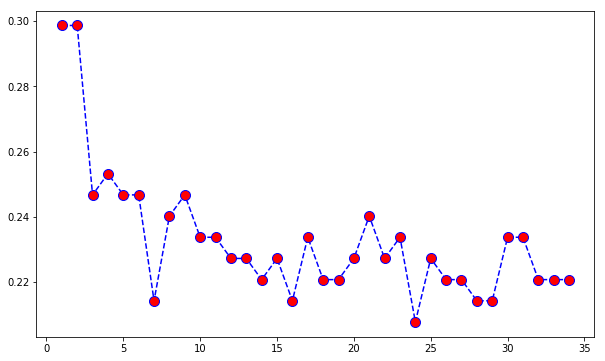

In [366]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate, color = 'b',linestyle = '--',marker ='o',markerfacecolor='red',markersize = 10 )

In [367]:
knn=KNeighborsClassifier(n_neighbors=24)
knn.fit(X_train,y_train)
pred_final = knn.predict(X_test)

In [368]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,pred_final))
print(classification_report(y_test,pred_final))

[[87 12]
 [20 35]]
             precision    recall  f1-score   support

          0       0.81      0.88      0.84        99
          1       0.74      0.64      0.69        55

avg / total       0.79      0.79      0.79       154



In [369]:
knn.score(X_test,y_test)

0.7922077922077922

In [370]:
from sklearn.preprocessing import RobustScaler
scaler=MinMaxScaler()
scaler.fit(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','pdratio']])
scaled_features = scaler.transform(df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age','pdratio']])
scaled_features

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.23441503, 0.48333333,
        0.09792268],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.11656704, 0.16666667,
        0.1011144 ],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.25362938, 0.18333333,
        0.11684003],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.07130658, 0.15      ,
        0.23237553],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.11571307, 0.43333333,
        0.16309993],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.10119556, 0.03333333,
        0.12879045]])

In [371]:
scaled=pd.DataFrame(scaled_features)
categorical=df[['Obesity_Normal', 'Obesity_Obese 1', 'Obesity_Obese 2',
                'Obesity_Obese 3', 'Obesity_Overweight', 'Result_Diabetic',
       'Result_Normal', 'Result_Prediabetic', 'Level_High',
       'Level_Low']]
X=pd.merge(scaled,categorical,left_index=True,right_index=True)
y=df['Outcome']

In [372]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [373]:
knn = KNeighborsClassifier()
knn.fit(X_train,y_train)
y_pred = knn.predict(X_test)
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test,y_pred))
print(roc_auc_score(y_test, y_pred))
print(accuracy_score(y_test,y_pred))

             precision    recall  f1-score   support

          0       0.78      0.84      0.81        99
          1       0.67      0.58      0.62        55

avg / total       0.74      0.75      0.74       154

[[83 16]
 [23 32]]
0.7101010101010101
0.7467532467532467


In [374]:
error_rate=[]
for i in range(1,35):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    pred = knn.predict(X_test)
    error_rate.append(np.mean((y_test != pred)))

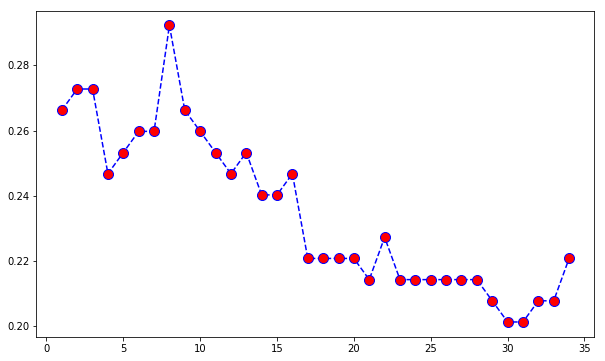

In [375]:
plt.figure(figsize=(10,6))
plt.plot(range(1,35),error_rate, color = 'b',linestyle = '--',marker ='o',markerfacecolor='red',markersize = 10 )

In [376]:
knn=KNeighborsClassifier(n_neighbors=30)
knn.fit(X_train,y_train)
pred = knn.predict(X_test)

In [377]:
knn.score(X_test,y_test)

0.7987012987012987